<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 3 </H1>

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

## Samples from the normal distribution

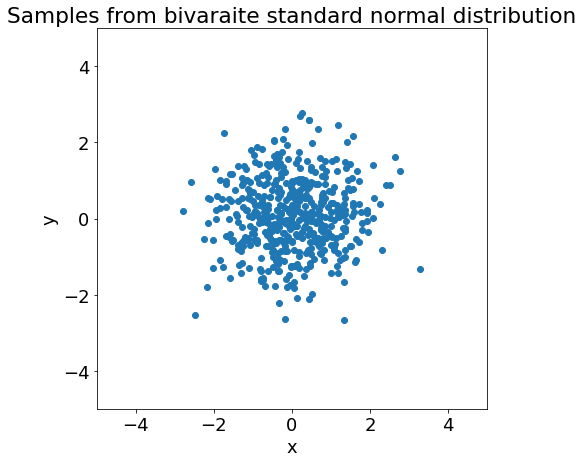

In [90]:
from matplotlib import pyplot as plt
n = 500
z = np.random.randn(2,n)

plt.scatter(z[0], z[1])
plt.title("Samples from bivaraite standard normal distribution")
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Samples from non-standard normal distribution:

In [126]:
mux = 1
muy = -.5
rho = .7
sigX = 1
sigY = 1.5
mu = np.array([[mux, muy]])

Sig = np.array([[sigX ** 2, rho * sigX * sigY], #desired covariance matrix
                [rho * sigX * sigY, sigY**2]])
A = np.linalg.cholesky(Sig)  # "matrix square root" of Sig

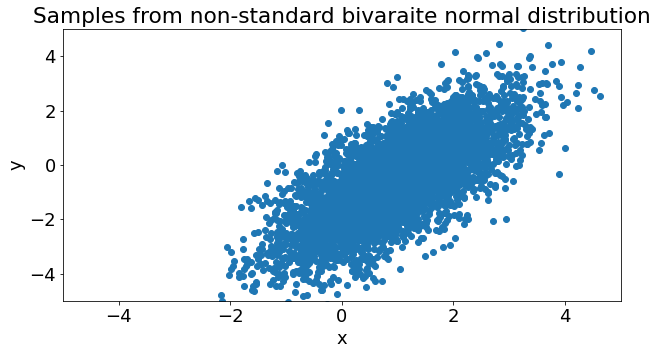

In [128]:
n = 5000
z = np.random.randn(2,n)
x, y = mu.T + np.dot(A, z)

plt.scatter(x, y)
plt.title("Samples from non-standard bivaraite normal distribution")
plt.xlim((-5,5)); plt.ylim((-5,5))
plt.xlabel('x'); plt.ylabel('y')
plt.show()

### Marginal distributions:

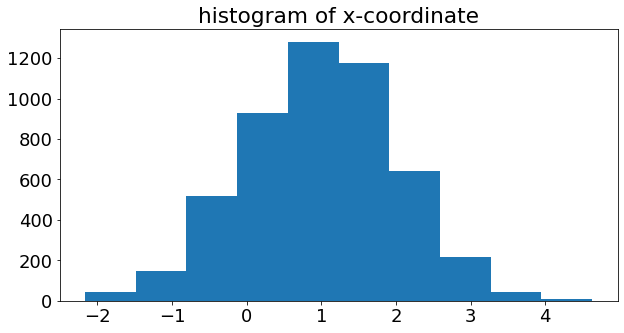

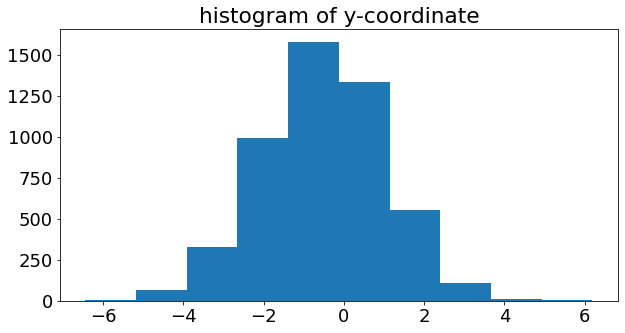

In [129]:
plt.hist(x); plt.title('histogram of x-coordinate'); plt.show()
plt.hist(y); plt.title('histogram of y-coordinate'); plt.show()

### Conditional Expectation

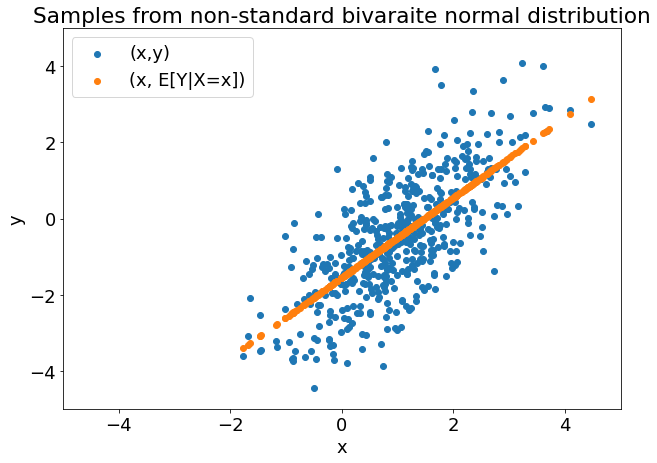

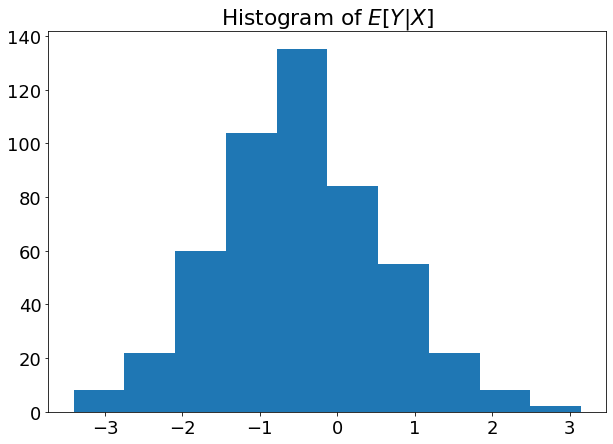

Var[Y|X] = 1.1475
Estimated Var[Y|X] = 1.1515695278742129


In [87]:
Ey_x = muy + rho * sigY * (x - mux) / sigX  # μy + ρσy (X −μx)/σx 
Vy_x = sigY ** 2 * (1 - rho ** 2) # σ2y (1 −ρ2)

plt.scatter(x, y)
plt.scatter(x, Ey_x)
plt.legend(['(x,y)', '(x, E[Y|X=x])'])
plt.title("Samples from non-standard bivaraite normal distribution")
plt.xlim((-5,5)); plt.ylim((-5,5))

plt.xlabel('x'); plt.ylabel('y')
plt.show()

plt.hist(Ey_x); plt.title("Histogram of $E[Y|X]$"); plt.show()
print(f"Var[Y|X] = {Vy_x}")
print(f"Estimated Var[Y|X] = {np.var(Ey_x)}")


## Height-Weight

In [34]:
data = pd.read_csv("weight-height.csv")
KGS_IN_POUND = 0.453592
CENT_IN_INCH = 2.54
data['Height'] = data['Height'] * CENT_IN_INCH
data['Weight'] = data['Weight'] * KGS_IN_POUND
#data = data.sample(n = 100)

In [35]:
# we can find the solution as follows
x = data['Height']
y = data['Weight']

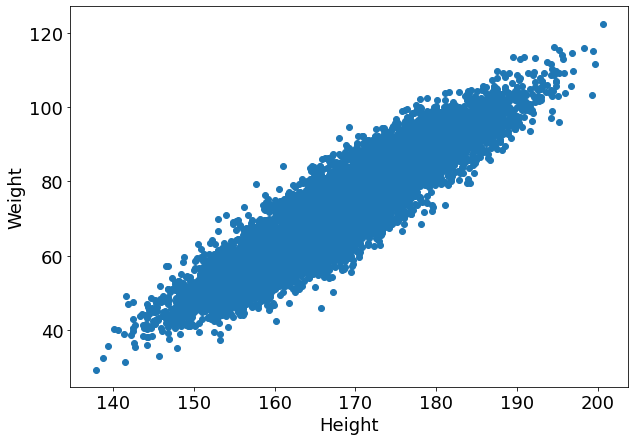

In [36]:
plt.scatter(x, y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## CLT

<left>
<img src="clt_anim.gif" width=500 align="left">
</left>


## Distributions

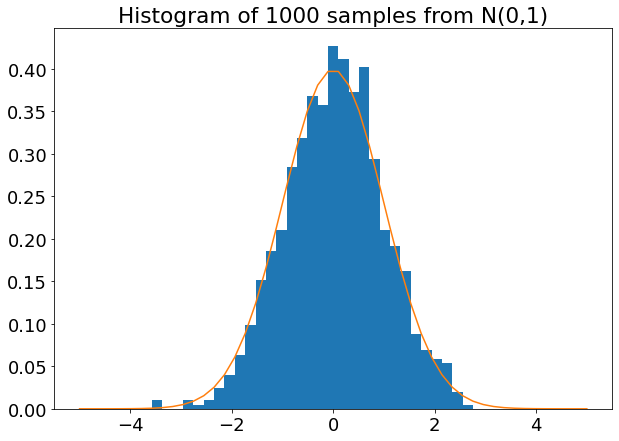

In [29]:
import scipy
G = 50
n = 1000
xx = np.linspace(-5, 5, G)
z = np.random.randn(n)
plt.hist(z, density=True, bins=xx)
plt.plot(xx, scipy.stats.norm.pdf(xx))
plt.title(f"Histogram of {n} samples from N(0,1)")
plt.show()

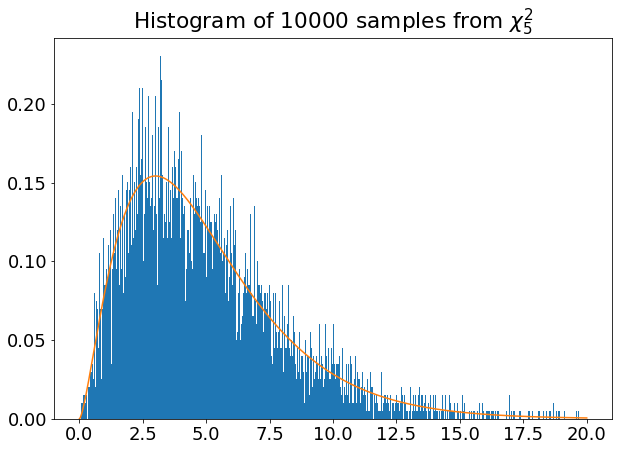

In [30]:
# chisquared
G = 1000
n = 10000
k = 5
xmax = 20
xmin = 0
xx = np.linspace(xmin, xmax, G)
z = np.random.randn(n, k)

x = np.sum(z ** 2, axis=1)

plt.hist(x, density=True, bins=xx)
plt.plot(xx, scipy.stats.chi2.pdf(xx, k))
plt.title(f"Histogram of {n} samples from $\chi^2_{k}$")

plt.show()

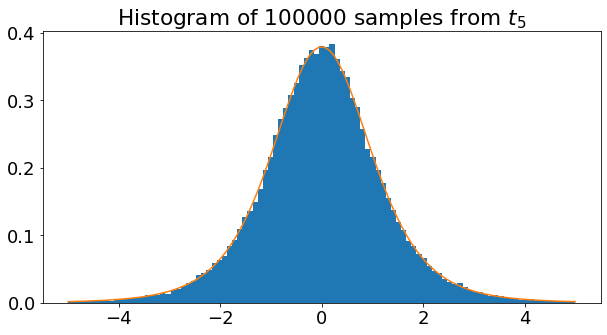

In [131]:
# chisquared
G = 100
n = 100000
k = 5

xmax = 5
xmin = -5
xx = np.linspace(xmin, xmax, G)
z = np.random.randn(n, k)
u = np.random.randn(n)

v = np.sum(z ** 2, axis=1)
x = u / np.sqrt(v / k)

plt.hist(x, density=True, bins=xx)
plt.plot(xx, scipy.stats.t.pdf(xx, k))
plt.title(f"Histogram of {n} samples from $t_{k}$")

plt.show()

# SVD

In [92]:
# 
data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots

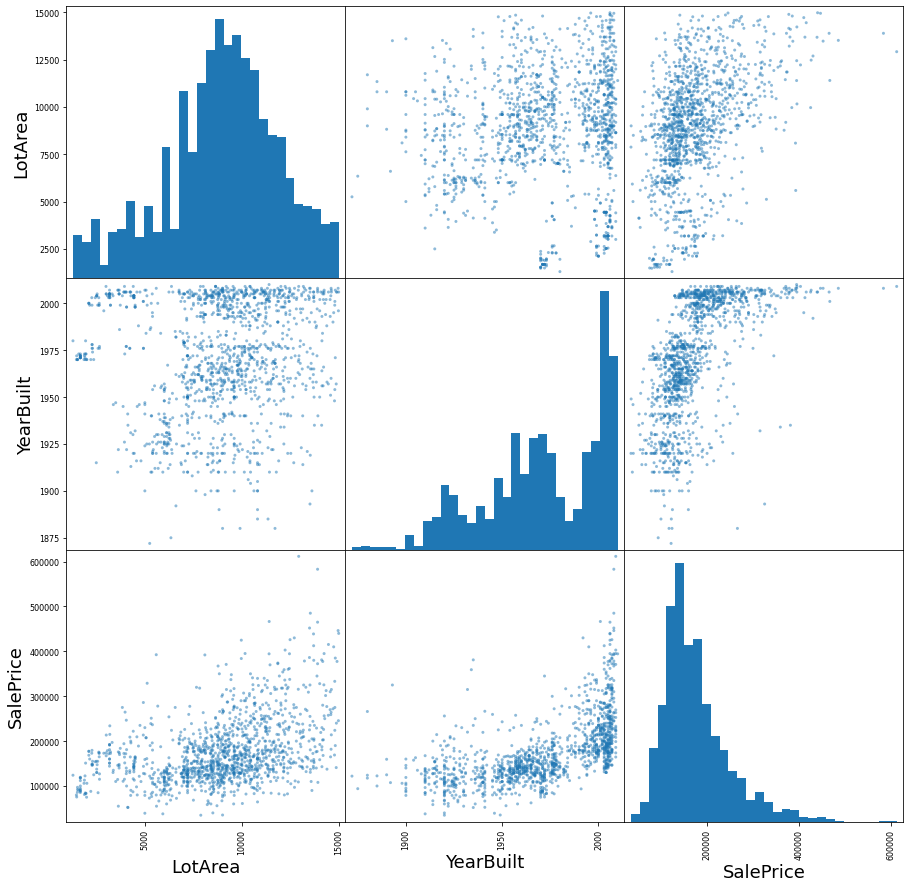

In [93]:
plt.rcParams['figure.figsize'] =  [15, 15]

data_red = data.filter(
    [#'GarageCars',
    'LotArea', 
    'YearBuilt',
    'SalePrice'])

data['h-MSZoning'] = data.MSZoning.apply(hash) # convert this categorical data to numeric

pd.plotting.scatter_matrix(data_red,
            hist_kwds={'bins':30})

plt.show()
plt.rcParams["figure.figsize"] = (10,5)

In [106]:
import statsmodels.formula.api as smf

x1 = data['LotArea'].values
x2 = data['YearBuilt'].values
y = data['SalePrice'].values

Z = np.vstack([np.ones_like(x1), x1, x2]).T
#model = smf.ols(formula='SalePrice ~ LotArea + YearBuilt', data=data).fit()
#model.summary2()
A= np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)
beta_hat = np.dot(A, y)
print("beta_hat = ", beta_hat)

beta_hat =  [-2.46808238e+06  9.07230986e+00  1.29955893e+03]


In [119]:
thresh = 1e-7

U, Sig, V = np.linalg.svd(Z) # SVD
beta_star = np.zeros(3)

y_star = np.dot(U.T, y)
for j,sig in enumerate(Sig):
    if sig > thresh:
        beta_star[j] = y_star[j] / sig
beta_hat = np.dot(V.T, beta_star)
print("beta_hat = ",beta_hat)

beta_hat =  [-2.46808238e+06  9.07230986e+00  1.29955893e+03]
